# Web Scraping using Python

### Project - Working with Multiple Pages and Items

The website: http://books.toscrape.com/index.html is specifically designed for people to scrape it. Let's try to get the title of every book that has a 2 star rating and at the end just have a Python list with all titles.


## Import Libraries

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

<div class="alert alert-success">
    
**1-**
- Figure out the URL structure to go through every page
- Scrap every page in the catalogue
  
**Tips:**
- start with the first page : http://books.toscrape.com/catalogue/page-1.html 
- make sure that each book has the product_pod class..
 
</div>

In [66]:
for i in range(1,11):
    url = f'http://books.toscrape.com/catalogue/page-{i}.html'
    url_format = 'http://books.toscrape.com/catalogue/page-{}.html'.format(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    books = soup.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')
    #print(books.prettify())
    for book in books:
        title = book.find('h3').find('a')["title"]
        print(title)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas
In Her Wake
How Music Works
Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More
Chase Me (Paris Nights #2)
Black Dust
Birdsong: A Story in Pictures
A

In [67]:
#TBD

* grab the products (books) from the get request result:

In [68]:
#TBD

In [69]:
#TBD

<div class="alert alert-success">
    
**2-**
- Each book has the product_pod class -> you can select any tag with this class, and then further reduce it by its rating.
- Figure out what tag/class represents the Star rating (two-stars,three-stars)
- Filter by that star rating using an if statement
- Store the results to a list
    
**Tips:**
- inspect the site and analyse the sub classes (tag-children) for the first book for example
- inspect a book example sources to find the title element

 
</div>

In [70]:
#TBD
products = soup.select(".product_pod")


In [71]:
example = products[0]
print(example)
example.attrs


<article class="product_pod">
<div class="image_container">
<a href="modern-romance_820/index.html"><img alt="Modern Romance" class="thumbnail" src="../media/cache/28/78/2878538a1039d9c4649110499a1393fb.jpg"/></a>
</div>
<p class="star-rating Five">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="modern-romance_820/index.html" title="Modern Romance">Modern Romance</a></h3>
<div class="product_price">
<p class="price_color">£28.26</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>


{'class': ['product_pod']}

In [72]:
type(example)

bs4.element.Tag

In [73]:
example.attrs

{'class': ['product_pod']}

In [74]:
list(example.children)


['\n',
 <div class="image_container">
 <a href="modern-romance_820/index.html"><img alt="Modern Romance" class="thumbnail" src="../media/cache/28/78/2878538a1039d9c4649110499a1393fb.jpg"/></a>
 </div>,
 '\n',
 <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 '\n',
 <h3><a href="modern-romance_820/index.html" title="Modern Romance">Modern Romance</a></h3>,
 '\n',
 <div class="product_price">
 <p class="price_color">£28.26</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 '\n']

we are looking for 2 stars, so we'll be interested for the 10th book 

In [75]:
example.select('.star-rating Five')

example.select('a')

example.select('a')[1]

example.select('a')[1]['title']



'Modern Romance'

let's get the title if we have a 2-star rating book:

In [76]:
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
two_star_titles = []

for n in range(1,51):

    scrape_url = base_url.format(n)
    res = requests.get(scrape_url)
    
    soup = BeautifulSoup(res.text,"lxml")
    books = soup.select(".product_pod")
    
    for book in books:
        if len(book.select('.star-rating.Two')) != 0:
            two_star_titles.append(book.select('a')[1]['title'])

In [77]:
#TBD
two_star_titles

['Starving Hearts (Triangular Trade Trilogy, #1)',
 'Libertarianism for Beginners',
 "It's Only the Himalayas",
 'How Music Works',
 'Maude (1883-1993):She Grew Up with the country',
 "You can't bury them all: Poems",
 'Reasons to Stay Alive',
 'Without Borders (Wanderlove #1)',
 'Soul Reader',
 'Security',
 'Saga, Volume 5 (Saga (Collected Editions) #5)',
 'Reskilling America: Learning to Labor in the Twenty-First Century',
 'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics',
 'Obsidian (Lux #1)',
 'My Paris Kitchen: Recipes and Stories',
 'Masks and Shadows',
 'Lumberjanes, Vol. 2: Friendship to the Max (Lumberjanes #5-8)',
 'Lumberjanes Vol. 3: A Terrible Plan (Lumberjanes #9-12)',
 'Judo: Seven Steps to Black Belt (an Introductory Guide for Beginners)',
 'I Hate Fairyland, Vol. 1: Madly Ever After (I Hate Fairyland (Compilations) #1-5)',
 'Giant Days, Vol. 2 (Giant Day

In [78]:
#TBD
two_star_titles[0]

'Starving Hearts (Triangular Trade Trilogy, #1)'

let's now loop on all the website (this can take some seconds to complete running. Be aware a firwall may prevent this script from running. Also if you are getting a no response error, maybe try adding a sleep step with time.sleep(1).

In [79]:
def get_star_rating(star:int) -> list:
    start = {1:'.star-rating.One', 2:'.star-rating.Two', 3:'.star-rating.Three', 4:'.star-rating.Four', 5:'.star-rating.Five'}
    for key in start:
        if star == key:
            start_class =  start[key]
            
    titles = []
    base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

    for n in range(1,51):
        scrape_url = base_url.format(n)
        res = requests.get(scrape_url)
        soup = BeautifulSoup(res.text,"lxml")
        books = soup.select(".product_pod")
        
        for book in books:
            if len(book.select(start_class)) != 0:
                titles.append(book.select('a')[1]['title'])
    
    return titles
   
 

In [83]:
#len(two_star_titles)
one_star = get_star_rating(2)

In [86]:
len(one_star)

196

In [87]:
two_star_titles

['Starving Hearts (Triangular Trade Trilogy, #1)',
 'Libertarianism for Beginners',
 "It's Only the Himalayas",
 'How Music Works',
 'Maude (1883-1993):She Grew Up with the country',
 "You can't bury them all: Poems",
 'Reasons to Stay Alive',
 'Without Borders (Wanderlove #1)',
 'Soul Reader',
 'Security',
 'Saga, Volume 5 (Saga (Collected Editions) #5)',
 'Reskilling America: Learning to Labor in the Twenty-First Century',
 'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics',
 'Obsidian (Lux #1)',
 'My Paris Kitchen: Recipes and Stories',
 'Masks and Shadows',
 'Lumberjanes, Vol. 2: Friendship to the Max (Lumberjanes #5-8)',
 'Lumberjanes Vol. 3: A Terrible Plan (Lumberjanes #9-12)',
 'Judo: Seven Steps to Black Belt (an Introductory Guide for Beginners)',
 'I Hate Fairyland, Vol. 1: Madly Ever After (I Hate Fairyland (Compilations) #1-5)',
 'Giant Days, Vol. 2 (Giant Day

<div class="alert alert-success">

**3-**
- Créer un dataframe qui stock tout les 1000 livres avec comme colonne le titre du livre(title), sa notation(rating), son prix (price) et sa disponibilité(availability).
- Il existe environ 50 pages mais votre script doit prendre en compte une augmentation future de ce nombre de pages. 
</div>  

In [1]:

def data_collection(pages=51) -> dict:
    """data_collection function gets_data 

    :param pages: _description_, defaults to 51
    :type pages: int, optional
    :return: _description_
    :rtype: dict
    """
    rating = []
    price = []        
    titles = []
    in_stock = []
    page = []
    base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

    for n in range(1,pages):
        scrape_url = base_url.format(n)
        res = requests.get(scrape_url)
        soup = BeautifulSoup(res.text,"lxml")
        books = soup.select(".product_pod")
        
        for book in books:
            titles.append(book.select('a')[1]['title'])
            price.append(float(book.select(".price_color")[0].text.replace('Â£','')))
            rating.append(book.select('.star-rating')[0]['class'][1])
            if "In stock" in book.select(".instock.availability")[0].text : 
                in_stock.append(True)
            else: False
            page.append(n)
            
    return {"Titles":titles, "Price":price, "Rating":rating,"InStock":in_stock, "Page":page}
   
 

In [ ]:
# Replace rates
rep_rates = {
    "One":"1",
    "Two":"2",
    "Three":"3",
    "Four":"4",
    "Five":"5"
}



In [ ]:
data = data_collection()
df = pd.DataFrame(data)  
df['Rating'] = df['Rating'].replace(rep_rates).astype('int64')
df.head()


,Titles,Price,Rating,InStock,Page
0,A Light in the Attic,51.77,3,True,1
1,Tipping the Velvet,53.74,1,True,1
2,Soumission,50.10,1,True,1
3,Sharp Objects,47.82,4,True,1
4,Sapiens: A Brief History of Humankind,54.23,5,True,1


In [ ]:
# 10 best books sorted by price 
df.query('InStock==True').sort_values(by=['Rating','Price'], ascending=[False,True]).head(10)

,Titles,Price,Rating,InStock,Page
638,An Abundance of Katherines,10.00,5,True,32
302,Greek Mythic History,10.23,5,True,16
590,The Power Greens Cookbook: 140 Delicious Super...,11.05,5,True,30
316,Dear Mr. Knightley,11.21,5,True,16
601,The Darkest Corners,11.33,5,True,31
521,"Naturally Lean: 125 Nourishing Gluten-Free, Pl...",11.38,5,True,27
900,"Fruits Basket, Vol. 2 (Fruits Basket #2)",11.64,5,True,46
277,Old School (Diary of a Wimpy Kid #10),11.83,5,True,14
261,Superman Vol. 1: Before Truth (Superman by Gen...,11.89,5,True,14
535,Every Heart a Doorway (Every Heart A Doorway #1),12.16,5,True,27


In [ ]:
#  Find best rated book, available and cheapest by page
df.groupby(by=['Titles','Page']).agg({'Rating': 'max','Price':'min'})

,,Rating,Price
Titles,Page,,
"""Most Blessed of the Patriarchs"": Thomas Jefferson and the Empire of the Imagination",25,5,44.48
#GIRLBOSS,45,1,50.96
#HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.,3,5,23.11
'Salem's Lot,35,4,49.56
(Un)Qualified: How God Uses Broken People to Do Big Things,7,5,54.00
...,...,...,...
Zealot: The Life and Times of Jesus of Nazareth,11,3,24.70
Zero History (Blue Ant #3),35,1,34.77
"Zero to One: Notes on Startups, or How to Build the Future",23,3,34.06


In [ ]:
#TBD
max_price = df['Price'].max()
print(df.loc[df['Price'] == max_price])
min_price = df['Price'].min()
df.loc[df['Price'] == min_price]


                                 Titles  Price  Rating  InStock  Page
648  The Perfect Play (Play by Play #1)  59.99       3     True    33


,Titles,Price,Rating,InStock,Page
638,An Abundance of Katherines,10.0,5,True,32


In [ ]:

mone=df[df['Rating']==1].mean()

mfive=df[df['Rating']==5].mean()

print(mone, mfive)

<div class="alert alert-success">

**4-**
- Est-ce que la moyenne des prix des livres notés 1 est différente de la moyenne des prix des livrés notés 5 ? 
</div>

In [ ]:
df_one_star = df[df['Rating'] == 'One']
df_five_stars = df[df['Rating'] == 'Five']
print(df_one_star["Price"].mean())
print(df_five_stars["Price"].mean())
print(df_one_star.head())

34.385555555555555
31.651999999999997
                Titles  Price Rating  InStock
1   Tipping the Velvet  53.74    One     True
2           Soumission  50.10    One     True
5      The Requiem Red  22.65    One     True
9      The Black Maria  52.15    One     True
16                Olio  23.88    One     True


<div class="alert alert-success">

**5-**
- Représentez sous forme de camembert la répartition des notes 
</div>

([<matplotlib.patches.Wedge at 0x140c5be50>,
 [Text(0.8364465755372913, 0.7143928375004462, 'One Star'),
  Text(-0.33991867422268773, 1.046162174289766, 'Two Stars'),
  Text(-1.096609065490349, 0.0863050258350198, 'Three Stars'),
  Text(-0.49938956806635254, -0.9801071672559599, 'Four Stars'),
  Text(0.7778174593052023, -0.7778174593052025, 'Five Stars')],
 [Text(0.4562435866567043, 0.3896688204547888, '22.5%'),
  Text(-0.18541018593964784, 0.5706339132489632, '15.0%'),
  Text(-0.5981503993583721, 0.04707546863728352, '22.5%'),
  Text(-0.2723943098543741, -0.5346039094123417, '15.0%'),
  Text(0.42426406871192845, -0.4242640687119286, '25.0%')])

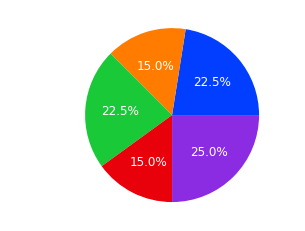

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_one_star = df[df['Rating'] == 'One']
df_two_stars = df[df['Rating'] == 'Two']
df_three_stars = df[df['Rating'] == 'Three']
df_four_stars = df[df['Rating'] == 'Four']
df_five_stars = df[df['Rating'] == 'Five']
pie_df = pd.DataFrame({"One Star":df_one_star.count(), 
                    "Two Stars":df_two_stars.count(), 
                    "Three Stars":df_three_stars.count(), 
                    "Four Stars":df_four_stars.count(), 
                    "Five Stars":df_five_stars.count()})
pie_df.loc["Titles"]
colors = sns.color_palette('bright')

plt.pie(pie_df.loc["Titles"], labels = [i for i in pie_df.loc["Titles"].index],colors=colors, autopct = '%1.1f%%',textprops = {'color': 'White','fontsize':12},)

## Good Job! 